In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(pd.__version__) 

2.2.3


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Product-Details.csv')

print(df.head())

   Product_Id Product_Category Product_Type           Products
0        1087         Clothing       Shorts     Cycling shorts
1        1165      Electronics       Tablet         Lenovo Tab
2        1271            Books   Children's   Sports equipment
3        1304       Home Decor        Tools      Utility knife
4        1059          Grocery    Chocolate  Chocolate cookies


In [11]:
df = df.drop_duplicates()

df['Product_Category'] = df['Product_Category'].fillna('Unknown')

In [12]:
customer_df = pd.read_csv("Customer-Details.csv")
product_df = pd.read_csv("Product-Details.csv")

customer_df.head(), product_df.head()

(   Customer_ID                 Name                Email         Phone  \
 0      37249.0  Michelle Harrington    Ebony39@gmail.com  1.414787e+09   
 1      69749.0          Kelsey Hill     Mark36@gmail.com  6.852900e+09   
 2      30192.0         Scott Jensen    Shane85@gmail.com  8.362160e+09   
 3      62101.0        Joseph Miller     Mary34@gmail.com  2.776752e+09   
 4      27901.0        Debra Coleman  Charles30@gmail.com  9.098268e+09   
 
                        Address        City            State  Zipcode  \
 0            3959 Amanda Burgs    Dortmund           Berlin  77985.0   
 1           82072 Dawn Centers  Nottingham          England  99071.0   
 2            4133 Young Canyon     Geelong  New South Wales  75929.0   
 3  8148 Thomas Creek Suite 100    Edmonton          Ontario  88420.0   
 4    5813 Lori Ports Suite 269     Bristol          England  48704.0   
 
      Country   Age  Gender Income Customer_Segment  
 0    Germany  21.0    Male    Low          Regular  


In [15]:
print(customer_df.columns)
print(product_df.columns)

Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment'],
      dtype='object')
Index(['Product_Id', 'Product_Category', 'Product_Type', 'Products'], dtype='object')


In [16]:
print(customer_df.columns)
print(product_df.columns)

Index(['Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State',
       'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment'],
      dtype='object')
Index(['Product_Id', 'Product_Category', 'Product_Type', 'Products'], dtype='object')


In [ ]:
sales_df = pd.read_csv("Product-Details.csv")  
print(sales_df.columns)

In [8]:
orders_df = pd.read_csv("Order-Details.csv")
print(orders_df.columns) 


Index(['Transaction_ID', 'Customer_ID', 'Date', 'Total_Purchases', 'Amount',
       'Product_Id', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings'],
      dtype='object')


In [9]:
orders_df['Date'] = pd.to_datetime(orders_df['Date'])

orders_df['Year_Month'] = orders_df['Date'].dt.to_period('M')

print(orders_df.isnull().sum())


Transaction_ID     333
Customer_ID        308
Date               359
Total_Purchases    361
Amount             357
Product_Id           0
Feedback           184
Shipping_Method    337
Payment_Method     297
Order_Status       235
Ratings            184
Year_Month         359
dtype: int64


In [14]:
monthly_sales = orders_df.groupby('Year_Month').agg(
    total_purchases=('Total_Purchases', 'sum'),
    total_amount=('Amount', 'sum')
).reset_index()

print(monthly_sales.head())


NameError: name 'orders_df' is not defined

In [11]:
print(monthly_sales['Year_Month'].dtype)

monthly_sales['Year_Month'] = pd.to_datetime(monthly_sales['Year_Month'].astype(str))

print(monthly_sales['Year_Month'].dtype)

period[M]
datetime64[ns]


In [12]:
print(monthly_sales[['total_purchases', 'total_amount']].dtypes)

monthly_sales['total_purchases'] = pd.to_numeric(monthly_sales['total_purchases'], errors='coerce')
monthly_sales['total_amount'] = pd.to_numeric(monthly_sales['total_amount'], errors='coerce')

print(monthly_sales[['total_purchases', 'total_amount']].isnull().sum())

total_purchases    float64
total_amount       float64
dtype: object
total_purchases    0
total_amount       0
dtype: int64


In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='total_purchases', data=monthly_sales, marker='o', label='Total Purchases')
sns.lineplot(x='Year_Month', y='total_amount', data=monthly_sales, marker='o', label='Total Amount', color='red')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.legend()
plt.show() 

NameError: name 'monthly_sales' is not defined

<Figure size 1200x600 with 0 Axes>

In [14]:
print(monthly_sales[monthly_sales['Year_Month'].isna()])

Empty DataFrame
Columns: [Year_Month, total_purchases, total_amount]
Index: []


In [15]:
monthly_sales_aggregated = monthly_sales.groupby('Year_Month').agg({
    'total_purchases': 'sum',
    'total_amount': 'sum'
}).reset_index()

print(monthly_sales_aggregated.head())

  Year_Month  total_purchases  total_amount
0 2023-03-01         137582.0  6.537171e+06
1 2023-04-01         132854.0  6.311766e+06
2 2023-05-01         135045.0  6.449291e+06
3 2023-06-01         132372.0  6.296884e+06
4 2023-07-01         137205.0  6.484790e+06


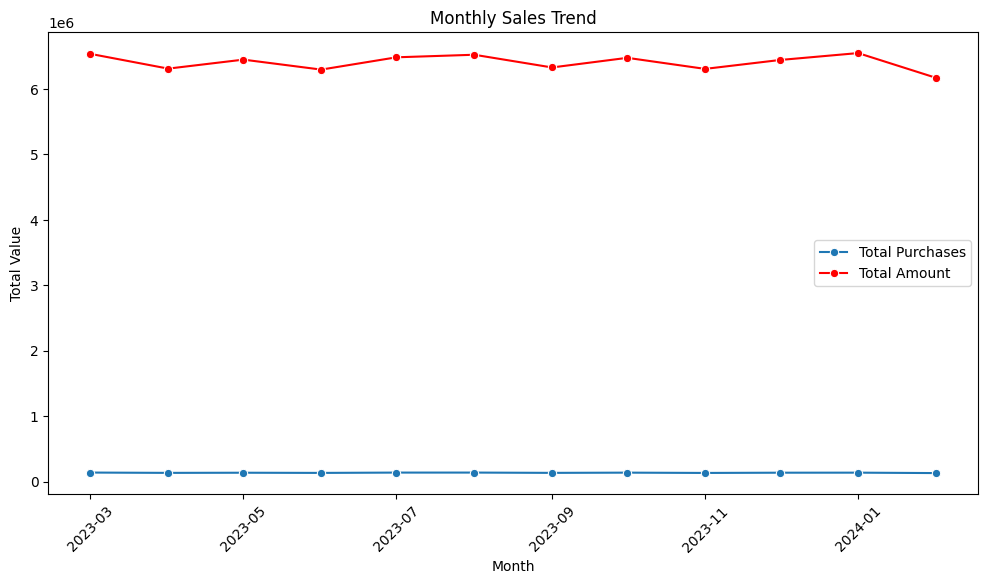

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year_Month', y='total_purchases', data=monthly_sales_aggregated, marker='o', label='Total Purchases')
sns.lineplot(x='Year_Month', y='total_amount', data=monthly_sales_aggregated, marker='o', label='Total Amount', color='red')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [17]:
print(monthly_sales['Year_Month'].unique())


<DatetimeArray>
['2023-03-01 00:00:00', '2023-04-01 00:00:00', '2023-05-01 00:00:00',
 '2023-06-01 00:00:00', '2023-07-01 00:00:00', '2023-08-01 00:00:00',
 '2023-09-01 00:00:00', '2023-10-01 00:00:00', '2023-11-01 00:00:00',
 '2023-12-01 00:00:00', '2024-01-01 00:00:00', '2024-02-01 00:00:00']
Length: 12, dtype: datetime64[ns]


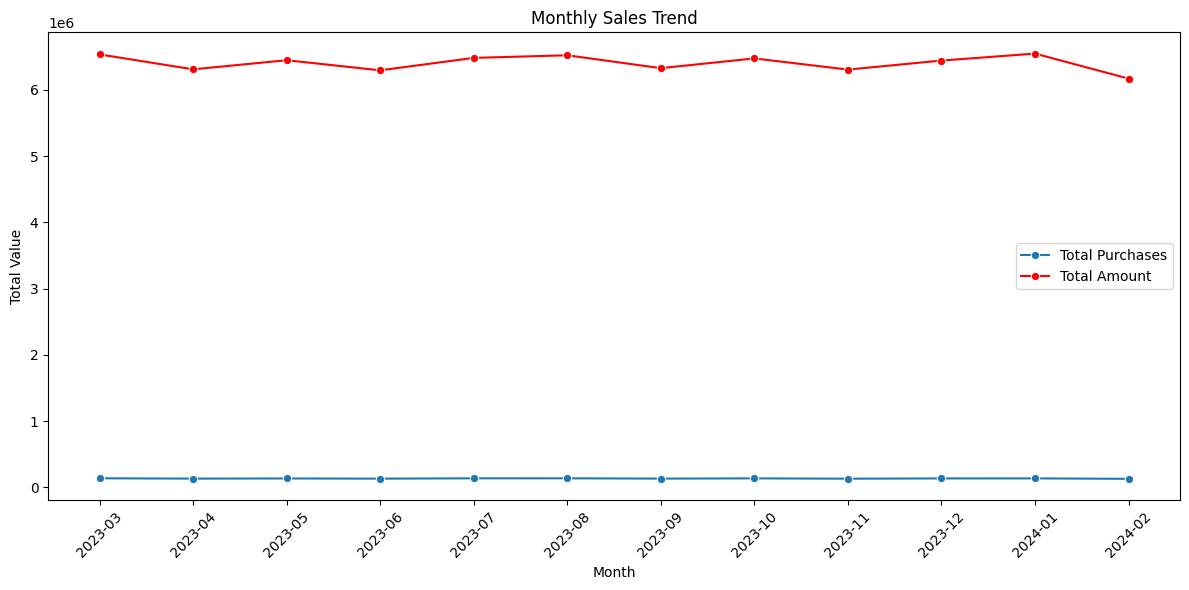

In [18]:
monthly_sales_aggregated['Year_Month'] = pd.to_datetime(monthly_sales_aggregated['Year_Month'], errors='coerce')

monthly_sales_aggregated['Year_Month'] = monthly_sales_aggregated['Year_Month'].dt.strftime('%Y-%m')

plt.figure(figsize=(12, 6))

sns.lineplot(x='Year_Month', y='total_purchases', data=monthly_sales_aggregated, marker='o', label='Total Purchases')

sns.lineplot(x='Year_Month', y='total_amount', data=monthly_sales_aggregated, marker='o', label='Total Amount', color='red')

plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Value")
plt.xticks(rotation=45)  
plt.legend()
plt.tight_layout() 
plt.show()


In [19]:
monthly_sales_aggregated.ffill(inplace=True)

In [20]:
pip install statsmodels


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Users/zionlawrence/myenv/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
decomposition = seasonal_decompose(monthly_sales_aggregated['total_amount'], model='multiplicative', period=6)

decomposition.plot()
plt.show()

NameError: name 'seasonal_decompose' is not defined

In [23]:
decomposition = seasonal_decompose(monthly_sales_aggregated['total_amount'], model='additive', period=6)

decomposition.plot()
plt.show()

NameError: name 'seasonal_decompose' is not defined

In [24]:
import numpy as np

monthly_sales_aggregated['log_total_amount'] = np.log(monthly_sales_aggregated['total_amount'])

decomposition = seasonal_decompose(monthly_sales_aggregated['log_total_amount'], model='additive', period=6)

decomposition.plot()
plt.show()

NameError: name 'seasonal_decompose' is not defined

In [25]:
print(monthly_sales_aggregated['total_amount'].min())

6171840.76049605


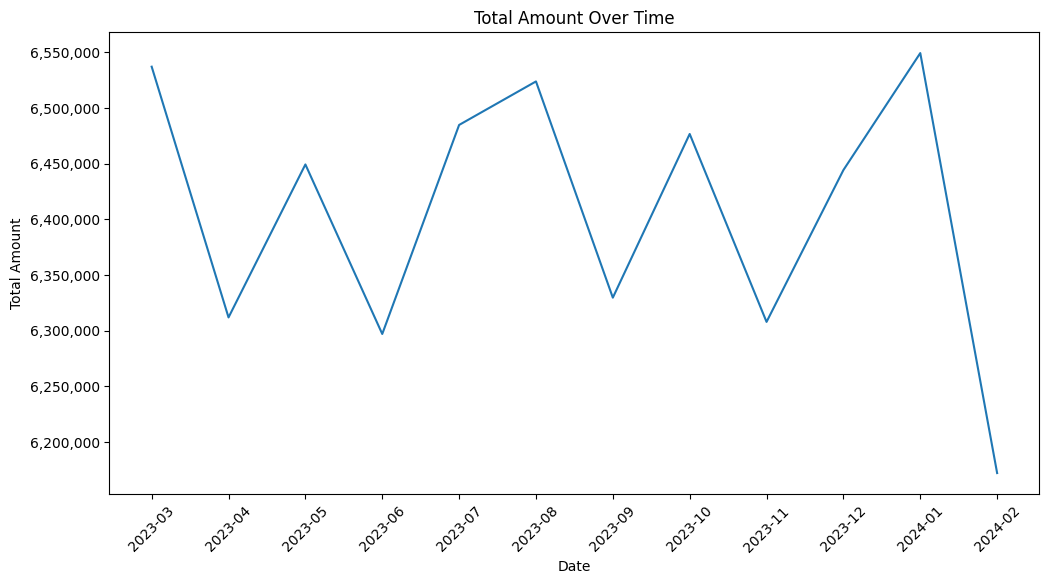

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_aggregated['Year_Month'], monthly_sales_aggregated['total_amount'])

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.title('Total Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")

In [28]:
orders = pd.read_csv('Order-Details.csv')
customers = pd.read_csv('Customer-Details.csv')
products = pd.read_csv('Product-Details.csv')

In [29]:
print(orders.head())
print(customers.head())
print(products.head())

   Transaction_ID  Customer_ID        Date  Total_Purchases      Amount  \
0       8691788.0      37249.0  2023-09-18              3.0  108.028757   
1       2174773.0      69749.0  2023-12-31              2.0  403.353907   
2       6679610.0      30192.0  2023-04-26              3.0  354.477600   
3       7232460.0      62101.0  2023-05-08              7.0  352.407717   
4       4983775.0      27901.0  2024-01-10              2.0  124.276524   

   Product_Id   Feedback Shipping_Method Payment_Method Order_Status  Ratings  
0        1087  Excellent        Same-Day     Debit Card      Shipped      5.0  
1        1165  Excellent        Standard    Credit Card   Processing      4.0  
2        1271    Average        Same-Day    Credit Card   Processing      2.0  
3        1304  Excellent        Standard         PayPal   Processing      4.0  
4        1059        Bad        Standard           Cash      Shipped      1.0  
   Customer_ID                 Name                Email         Phon

In [30]:
orders['Date'] = pd.to_datetime(orders['Date'])
orders['Year'] = orders['Date'].dt.year

In [31]:
merged_df = pd.merge(orders, customers, on='Customer_ID', how='left')

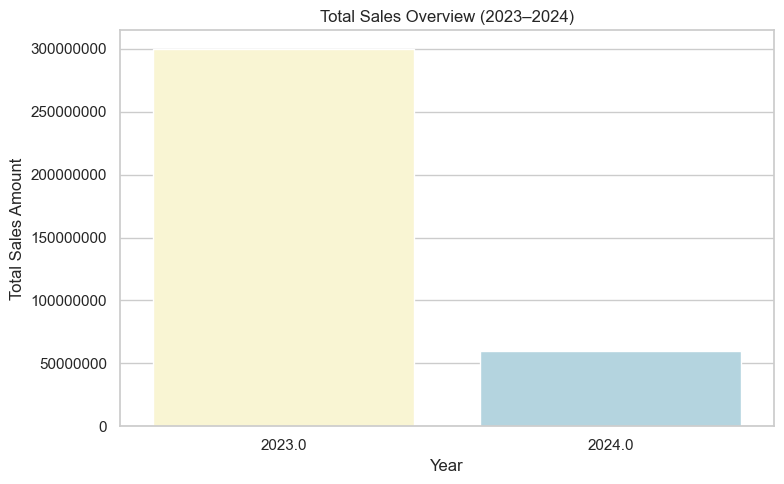

In [32]:
from matplotlib.ticker import ScalarFormatter

custom_palette = ["#FFFACD", "#ADD8E6", "#FFDAB9"]

sales_overall = merged_df.groupby('Year')['Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Year', y='Amount', data=sales_overall, palette=custom_palette[:len(sales_overall)], hue='Year', legend=False)
plt.title('Total Sales Overview (2023–2024)')
plt.ylabel('Total Sales Amount')
plt.xlabel('Year')
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

/var/folders/r9/6p4s_33n7f3gzzh0k0s6jqfw0000gn/T/ipykernel_54596/2977639694.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/r9/6p4s_33n7f3gzzh0k0s6jqfw0000gn/T/ipykernel_54596/2977639694.py:9: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(


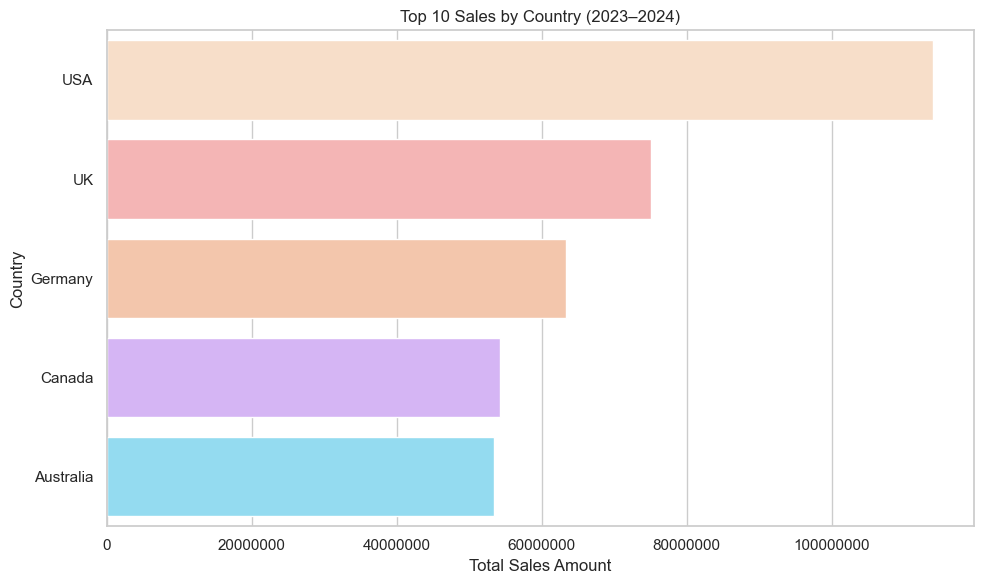

In [33]:
from matplotlib.ticker import ScalarFormatter

pastel_palette = ["#FFDDC1", "#FFABAB", "#FFC3A0", "#D5AAFF", "#85E3FF"]  

# Group sales by country, sort, and take top 10 for better visualization
sales_country = merged_df.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Amount',
    y='Country',
    data=sales_country.head(10),  
    palette=pastel_palette * 2  
)

plt.title('Top 10 Sales by Country (2023–2024)')
plt.xlabel('Total Sales Amount')
plt.ylabel('Country')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=False))
plt.ticklabel_format(style='plain', axis='x')  
plt.tight_layout()
plt.show()

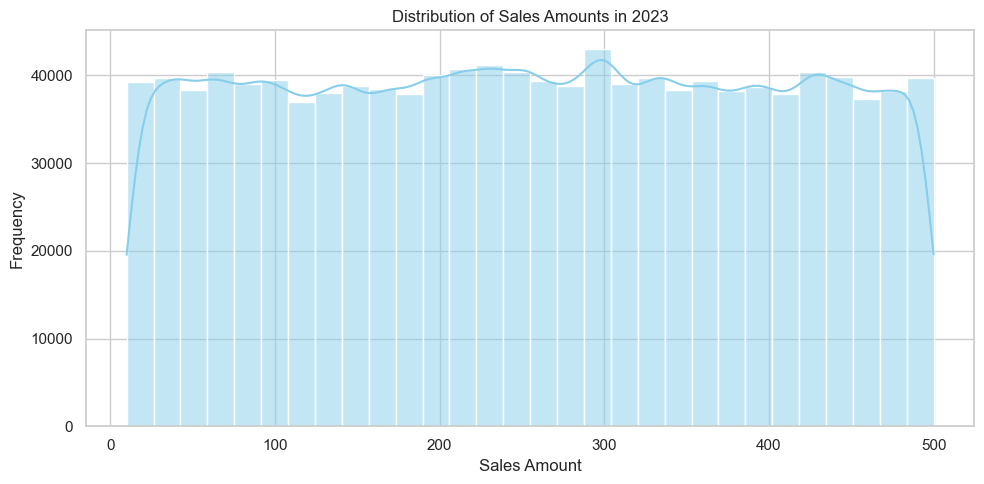

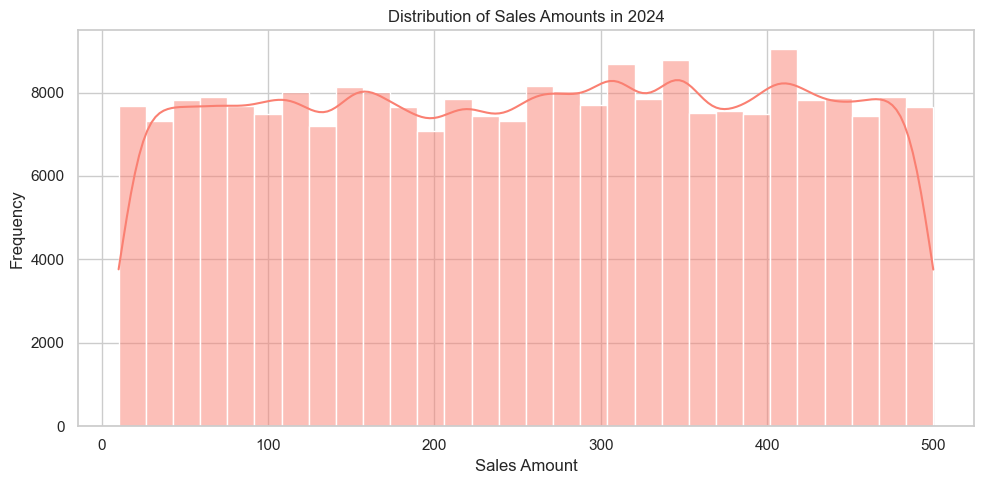

In [34]:
# Filter data
sales_2023 = merged_df[merged_df['Year'] == 2023]
sales_2024 = merged_df[merged_df['Year'] == 2024]

# Plot 2023
plt.figure(figsize=(10, 5))
sns.histplot(sales_2023['Amount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sales Amounts in 2023')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 2024
plt.figure(figsize=(10, 5))
sns.histplot(sales_2024['Amount'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Sales Amounts in 2024')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd

# Load datasets
orders = pd.read_csv('Order-Details.csv')
customers = pd.read_csv('Customer-Details.csv')
products = pd.read_csv('Product-Details.csv')

# Display first few rows
print("Orders DataFrame:")
print(orders.head())

print("\nCustomers DataFrame:")
print(customers.head())

print("\nProducts DataFrame:")
print(products.head())

# Show column names
print("\nOrders Columns:", orders.columns)
print("Customers Columns:", customers.columns)
print("Products Columns:", products.columns)

Orders DataFrame:
   Transaction_ID  Customer_ID        Date  Total_Purchases      Amount  \
0       8691788.0      37249.0  2023-09-18              3.0  108.028757   
1       2174773.0      69749.0  2023-12-31              2.0  403.353907   
2       6679610.0      30192.0  2023-04-26              3.0  354.477600   
3       7232460.0      62101.0  2023-05-08              7.0  352.407717   
4       4983775.0      27901.0  2024-01-10              2.0  124.276524   

   Product_Id   Feedback Shipping_Method Payment_Method Order_Status  Ratings  
0        1087  Excellent        Same-Day     Debit Card      Shipped      5.0  
1        1165  Excellent        Standard    Credit Card   Processing      4.0  
2        1271    Average        Same-Day    Credit Card   Processing      2.0  
3        1304  Excellent        Standard         PayPal   Processing      4.0  
4        1059        Bad        Standard           Cash      Shipped      1.0  

Customers DataFrame:
   Customer_ID               

In [5]:
orders = pd.read_csv('Order-Details.csv')
customers = pd.read_csv('Customer-Details.csv')
products = pd.read_csv('Product-Details.csv')

orders = orders.rename(columns=lambda x: x.strip())
customers = customers.rename(columns=lambda x: x.strip())
products = products.rename(columns=lambda x: x.strip())

# Merge datasets
merged_df = orders.merge(customers, on='Customer_ID', how='left') \
                  .merge(products, on='Product_Id', how='left')

# Check if merge worked
print("Merged DataFrame:")
print(merged_df.head())
print("Number of rows:", len(merged_df))

NameError: name 'pd' is not defined